In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely as shy
from shapely.ops import nearest_points
from shapely.geometry import Point, MultiPoint
import fiona
from fiona.crs import from_epsg
from scipy.spatial import cKDTree
import numpy as np
import osmnx as ox

pd.options.display.max_rows = 4
%matplotlib inline
import os
os.environ["PROJ_LIB"] = "C:\ProgramData\Anaconda3\Library\share" #window

In [2]:
#Filepaths
work = r"D:"
laptop = r"C:\Users\jerem"
origin = work

In [22]:
fp = r"\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile\analytical_panel_qt_shapefile_crosssec_thiessen_polygons.shp"
df1 = gpd.read_file(origin+fp)

In [23]:
df1.head(3)

,collision_,personsinj,pedestrian,cyclistinj,motoristin,bronx,brooklyn,manhattan,queens,statenisla,...,bike_rou_1,flag_senio,flag_prior,flag_schoo,quarter,year,intersecti,y,x,geometry
0,6,1,1,0,0,0,0,1,0,0,...,1,1,1,0,3,2012,1,199793.6093,986336.1490,"POLYGON ((986150.2933460365 199702.6472557705,..."
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,3,2012,2,202206.1619,982769.3310,"POLYGON ((982610.6377425257 202090.8501983829,..."
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,3,2012,3,201790.0942,982805.6184,"POLYGON ((982528.6632446027 201736.7410315565,..."


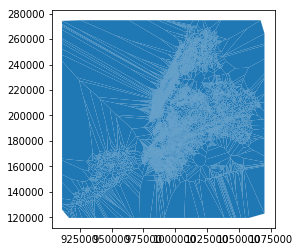

In [24]:
df1.plot()

In [26]:
df1.crs
df1 = df1.to_crs({'init': 'epsg:4326'})

In [27]:
fp = r"\Box Sync\Policy Evaluation\input_data\nyc_boroughs_2263\nyc_boroughs_2263.shp"
df2 = gpd.read_file(origin+fp)

In [28]:
df2.head()

,bcode,bname,name,namelsad,geometry
0,36005,Bronx,Bronx,Bronx County,(POLYGON ((1008982.068976385 272752.8735210547...
1,36047,Brooklyn,Kings,Kings County,(POLYGON ((978869.3811487257 186863.7807399245...
...,...,...,...,...,...
3,36081,Queens,Queens,Queens County,(POLYGON ((1026830.772887008 155435.7100568501...
4,36085,Staten Island,Richmond,Richmond County,(POLYGON ((930721.1281812892 156627.9162643671...


In [29]:
df2.crs

{'proj': 'lcc',
 'lat_1': 41.03333333333333,
 'lat_2': 40.66666666666666,
 'lat_0': 40.16666666666666,
 'lon_0': -74,
 'x_0': 300000.0000000001,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

In [30]:
# Reproeject LPIS shapefile to EPSG 4326: WGS84
df2 = df2.to_crs({'init': 'epsg:4326'})

In [31]:
df2.crs

{'init': 'epsg:4326'}

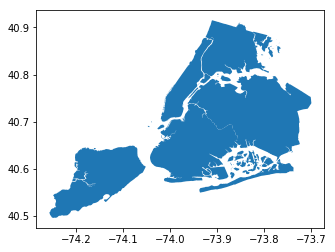

In [32]:
df2.plot()

In [33]:
df2.crs = df1.crs

In [34]:
# Intersection
intersection = gpd.overlay(df1, df2, how='intersection')

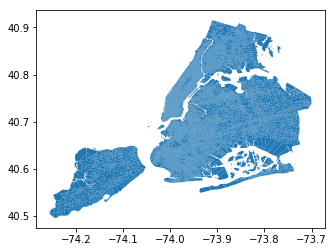

In [35]:
intersection.plot()

In [ ]:
fp = r"\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile\analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped.shp"

intersection.to_file(origin+fp)